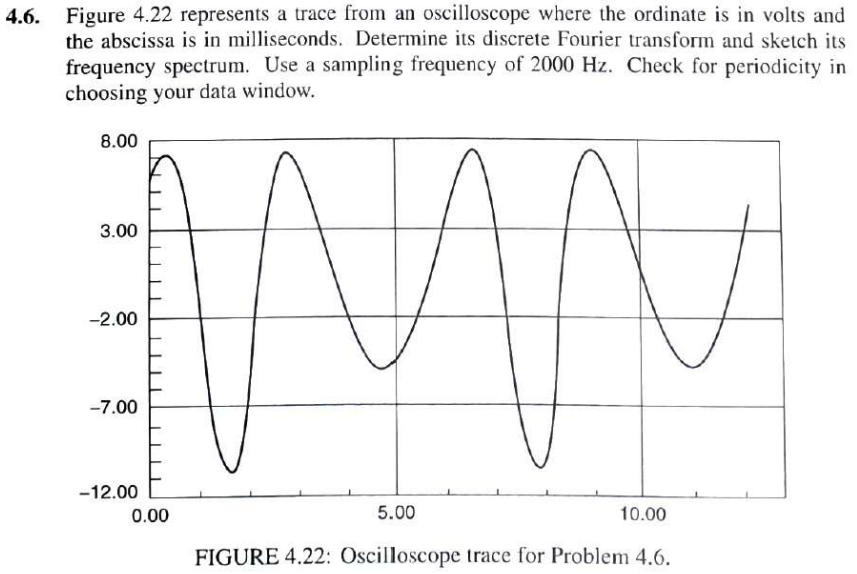

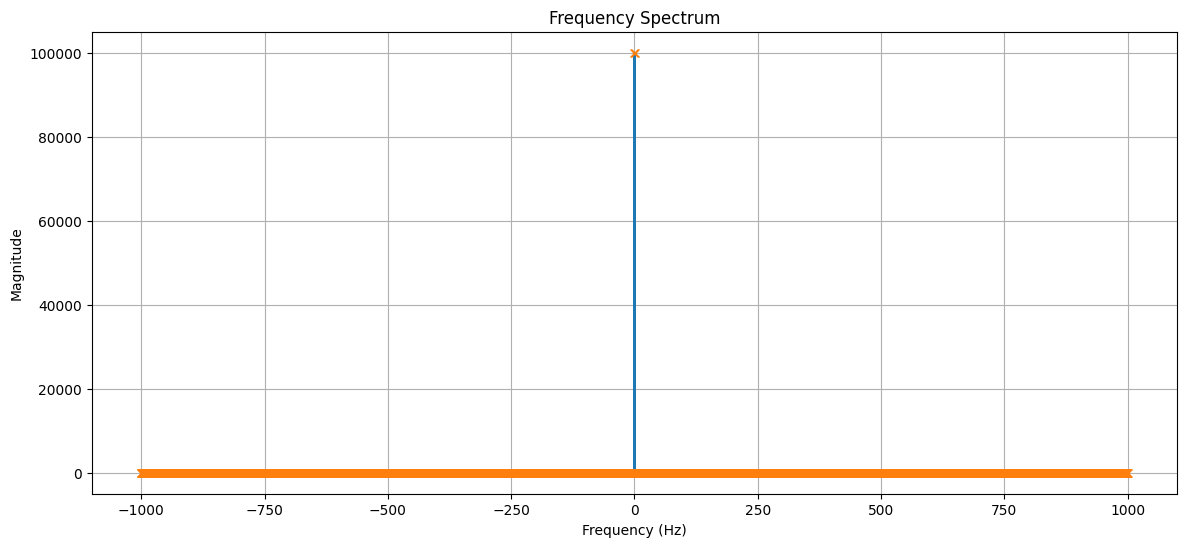

In [3]:
from scipy.fft import fft
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Since we can't extract the exact data from the image, let's assume the signal is a sampled sine wave
# We would typically extract the y values from the waveform data points

# Define the sampling frequency and the time vector based on the oscilloscope trace
sampling_frequency = 2000  # in Hz
time_period = 10  # in ms, given from the oscilloscope x-axis
time_vector = np.linspace(0, time_period, sampling_frequency * time_period, endpoint=False) / 1000  # convert ms to s

# Assuming the signal is a sine wave, let's create a sample signal for demonstration purposes
# From the oscilloscope trace, it looks like there are 2 cycles in 10 ms, so the frequency is 200 Hz
signal_frequency = 200  # in Hz
amplitude = 10  # peak amplitude in volts, estimated from the oscilloscope trace
sampled_signal = amplitude * np.sin(2 * np.pi * signal_frequency * time_vector)

# Calculate the DFT of the signal
dft = fft(sampled_signal)

# Compute the frequency bins
frequency_bins = np.fft.fftfreq(len(dft), 1/sampling_frequency)

# Find the peaks in the magnitude spectrum of the DFT to determine the main frequency components
magnitude_spectrum = np.abs(dft)
peaks, _ = find_peaks(magnitude_spectrum)

# Plot the frequency spectrum
plt.figure(figsize=(14, 6))
plt.plot(frequency_bins[:len(dft)//2], magnitude_spectrum[:len(dft)//2])  # Plot only the positive frequencies
plt.plot(frequency_bins[peaks], magnitude_spectrum[peaks], "x")  # Mark the peaks
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [5]:
# Output the peak frequencies and magnitudes for inspection
peak_frequencies = frequency_bins[peaks]

peak_frequencies

array([ 0.2,  0.9,  1.2, ..., -1.2, -0.9, -0.2])

In [6]:
peak_magnitudes = magnitude_spectrum[peaks]
peak_magnitudes

array([1.00000000e+05, 1.15005414e-12, 3.08524159e-12, ...,
       3.08524159e-12, 1.15005414e-12, 1.00000000e+05])